### Завдання
1. Створіть xls-документ, що містить дані про міста, їх населення, середній дохід жителів, площу території та наявність метрополітену. Кількість
записів у документі – 20.
2. За допомогою Plotly візуалізуйте залежності населення міста від його площі та середнього доходу від населення. Помістіть ці графіки на один
малюнок.
3. Побудуйте матрицю кореляцій та візуалізуйте її через heatmap.
4. Побудуйте звіти про таблицю за допомогою Sweetviz та Pandas Profiling; напишіть коротке порівняння цих звітів..




In [55]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import sweetviz as sv
import ydata_profiling as yp

#### 1. Датафрейм з інформацією про міста.

In [56]:
df = pd.read_excel('ukr_cities.xlsx')
df

,city,population,area_sq_km,income_uah,subway
0,Київ,2868702,839,20956,1
1,Харків,1451132,310,12374,1
2,Одеса,1017022,237,12609,0
3,Дніпро,1001094,405,13892,1
4,Запоріжжя,766268,334,14107,0
5,Львів,729038,171,12924,0
6,Кривий Ріг,652137,430,12500,1
7,Миколаїв,494922,260,14072,0
8,Маріуполь,458533,249,15287,0
9,Вінниця,372116,113,12782,0


#### 2. Графіки залежності населення міста від його площі та середнього доходу від населення.

In [57]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=df.area_sq_km, y=df.population, name='Населення', mode='lines+markers'), row=1, col=1)
fig.update_traces(hoverinfo='all', hovertemplate="Площа міста: %{x}<br>Населення: %{y}", col=1)

fig.add_trace(go.Scatter(x=df.population, y=df.income_uah, name='Середній дохід', mode='lines+markers'), row=1, col=2)
fig.update_traces(hoverinfo='all', hovertemplate="Населення: %{x}<br>Середній дохід: %{y}", col=2)

fig.update_layout(title="Графіки залежності населення міста від його площі та середнього доходу від населення.")
fig.update_xaxes(title='Площа міста, км.кв.', col=1, row=1)
fig.update_xaxes(title='Населення', col=2, row=1)
fig.update_yaxes(title='Населення', col=1, row=1)
fig.update_yaxes(title='Середній дохід, грн.', col=2, row=1)

fig.show()

#### 3. Матриця кореляції і теплова діаграма:

In [58]:
cities = pd.read_excel('ukr_cities.xlsx', index_col=0)
df_corr = cities.corr()
fig = go.Figure()
fig.add_trace(go.Heatmap(x=df_corr.columns, y=df_corr.index, z=df_corr, colorscale='ylorbr'))
fig.update_layout(title="Теплова діаграма")

#### 4.Звіти про таблицю з використанням Sweetviz та Pandas Profiling

                                             |          | [  0%]   00:00 -> (? left)


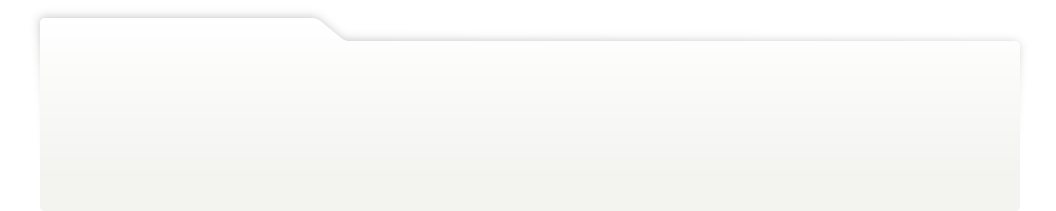
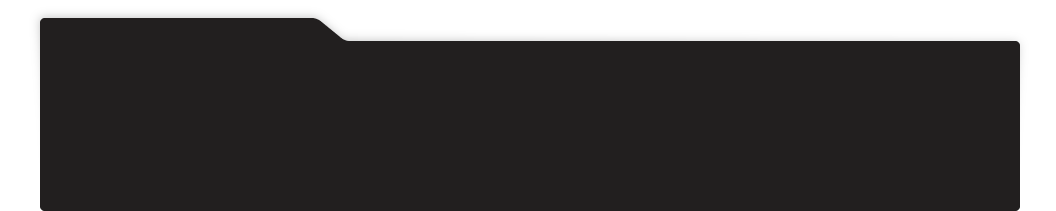
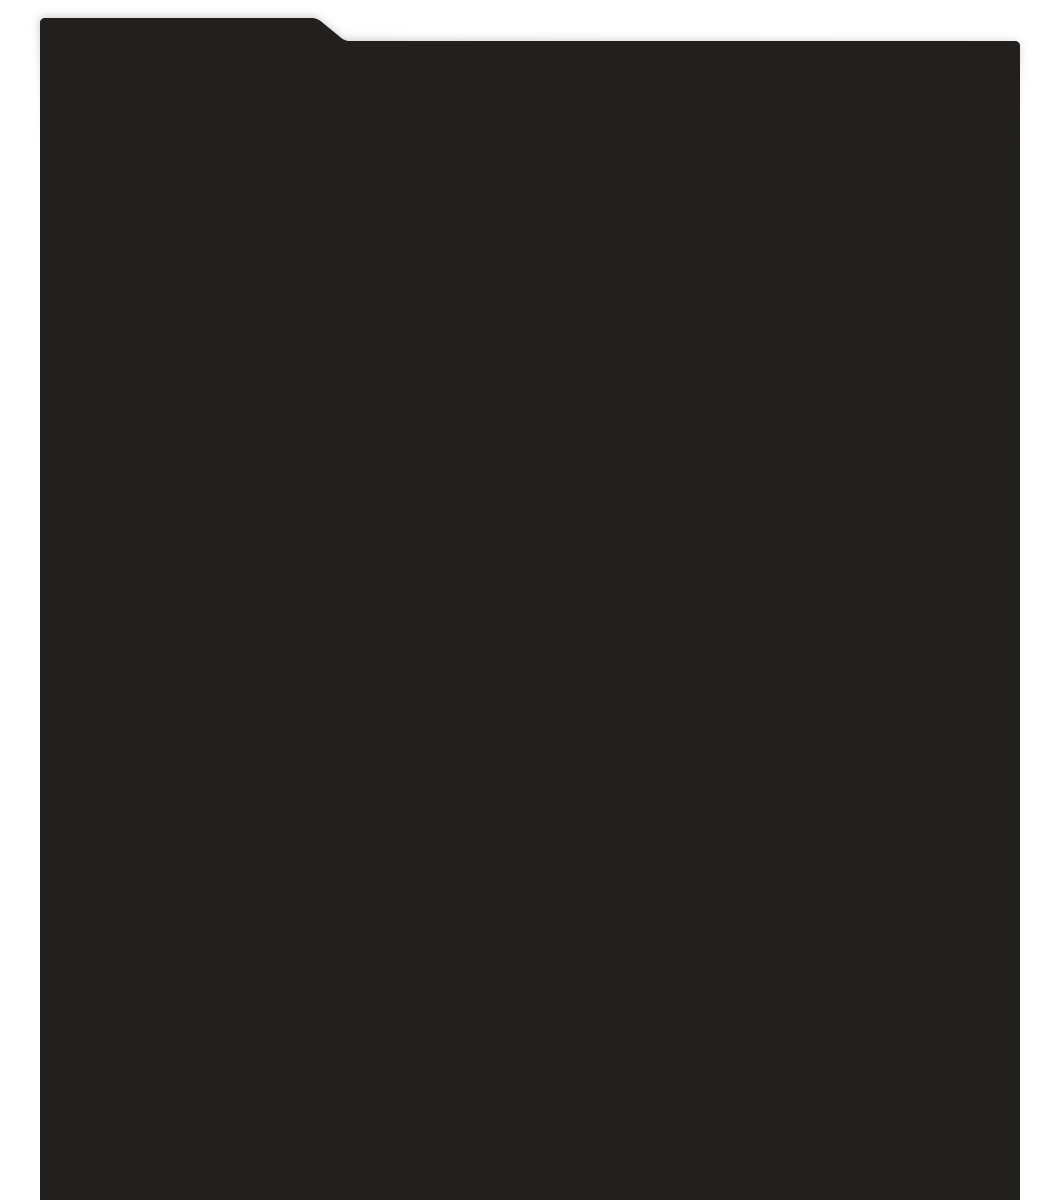
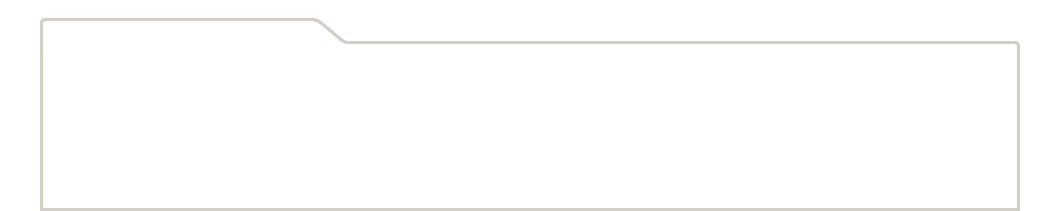
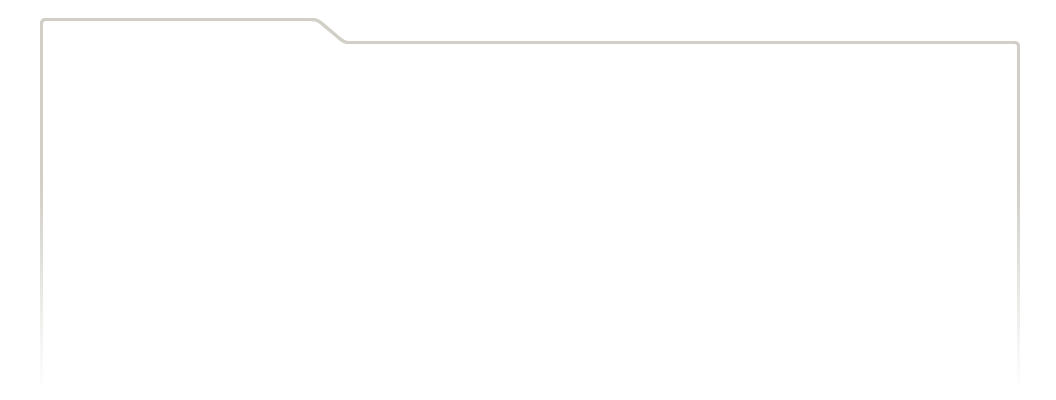
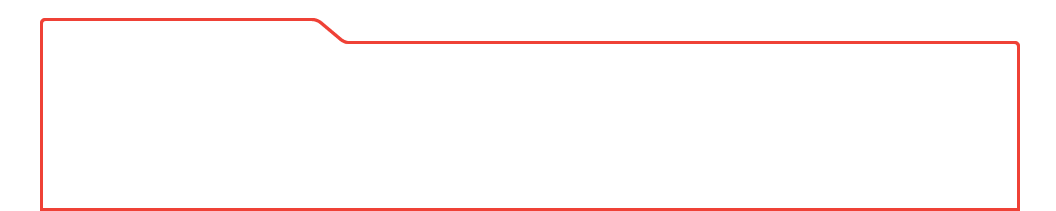
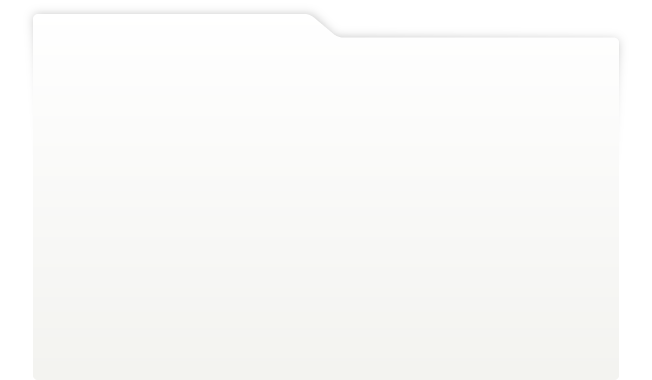
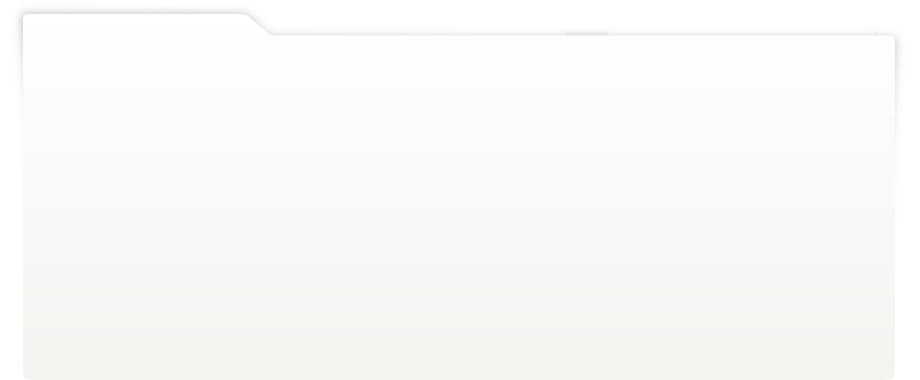
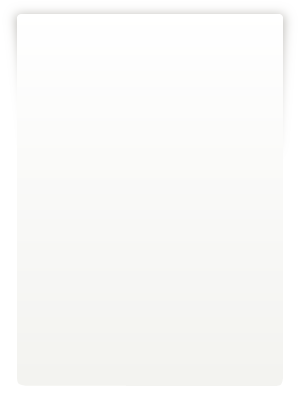
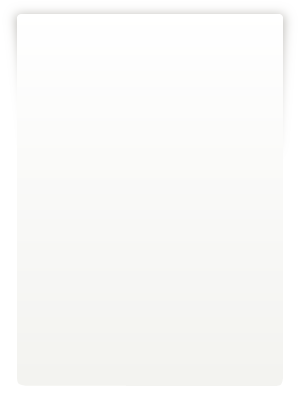
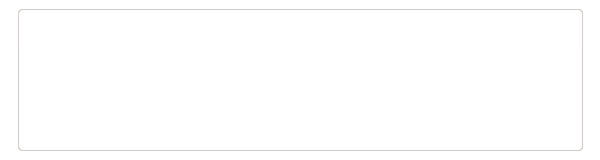
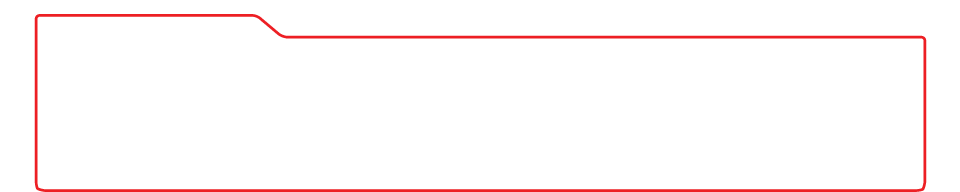
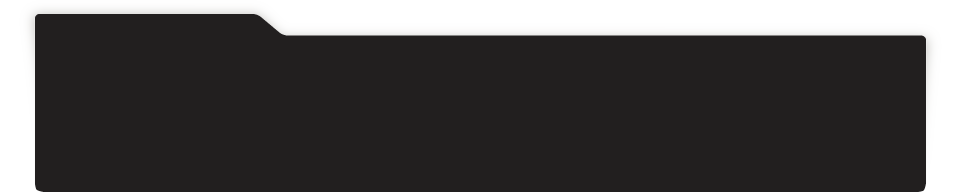
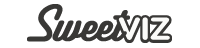
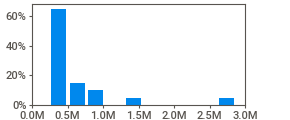
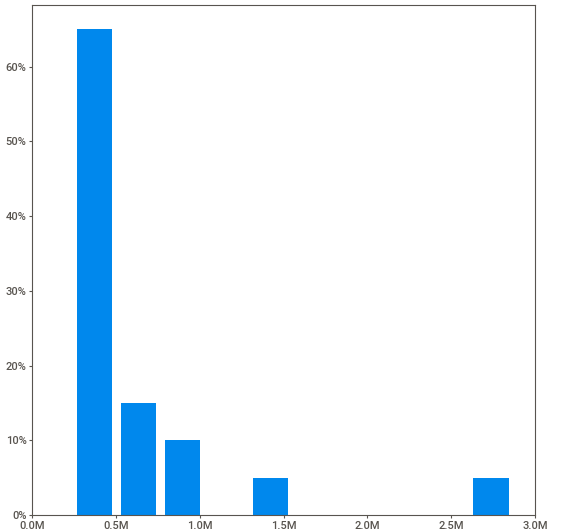
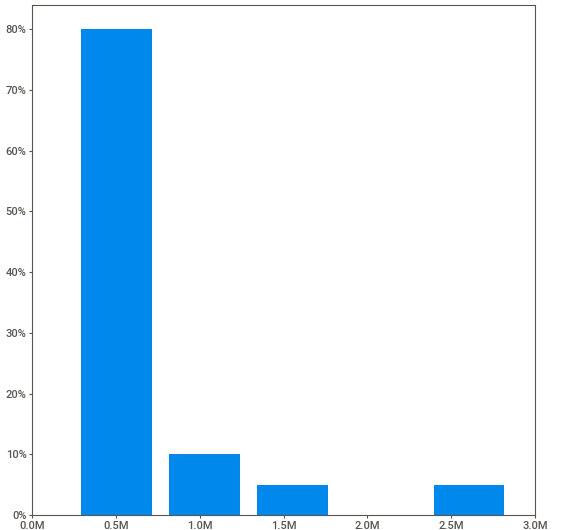
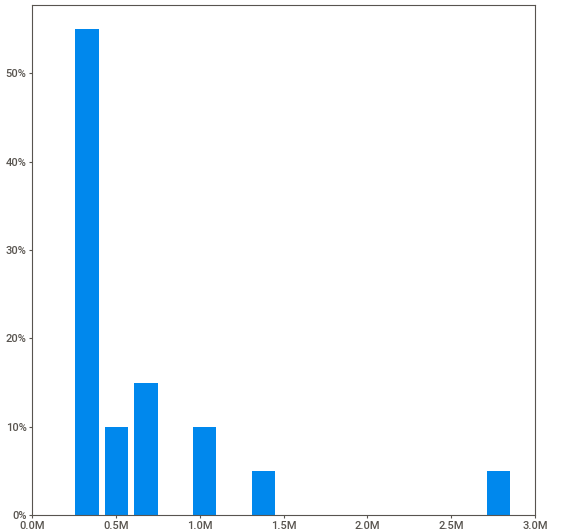
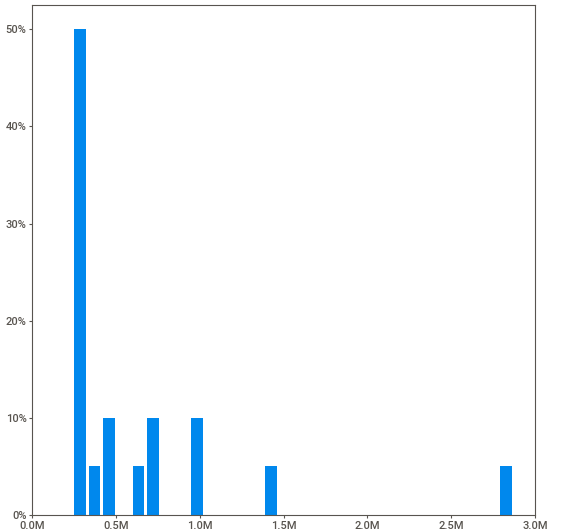
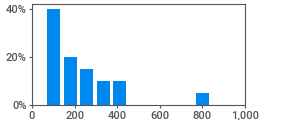
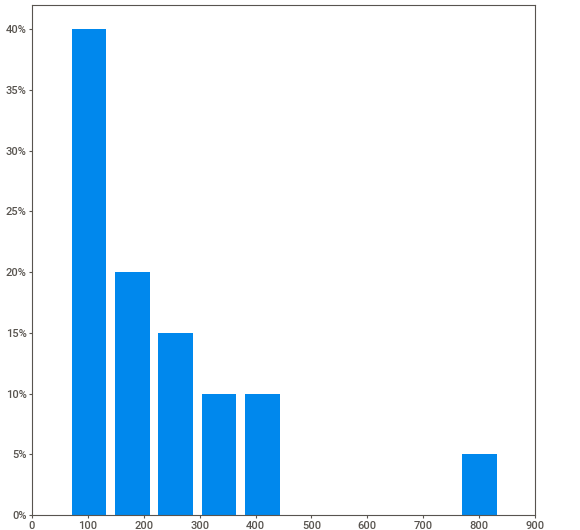
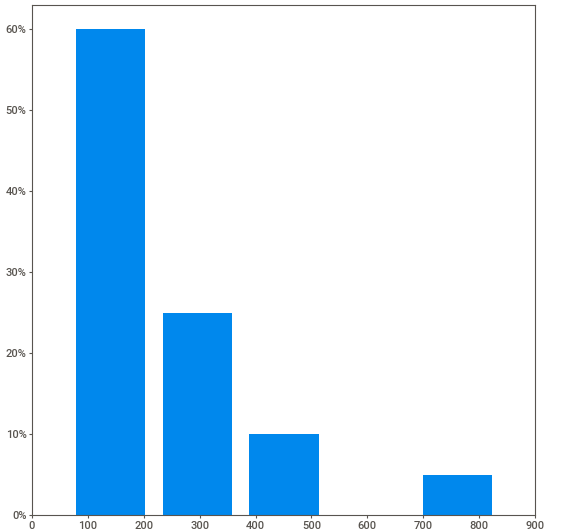
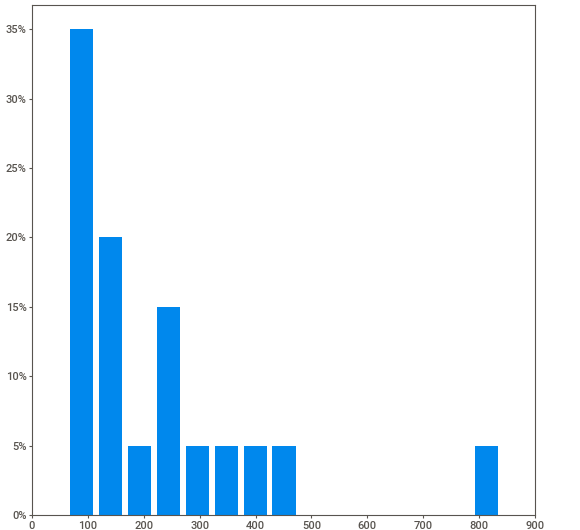
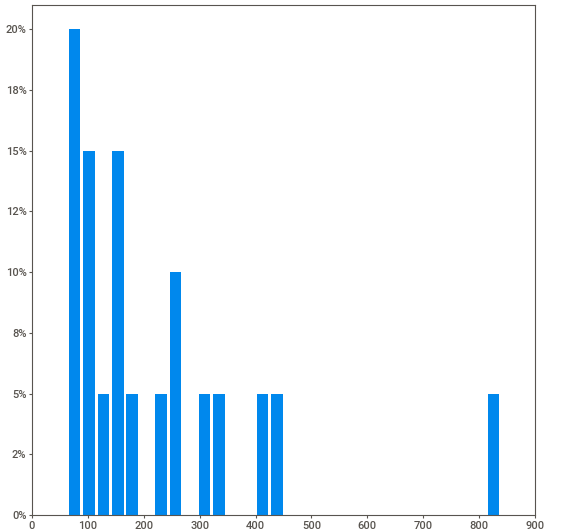
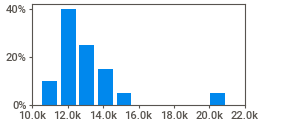
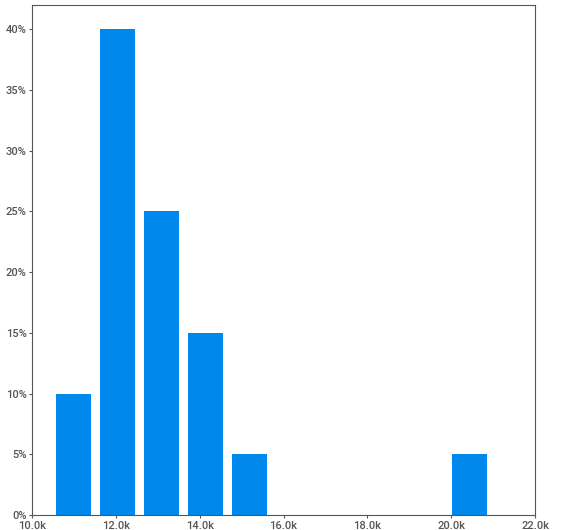
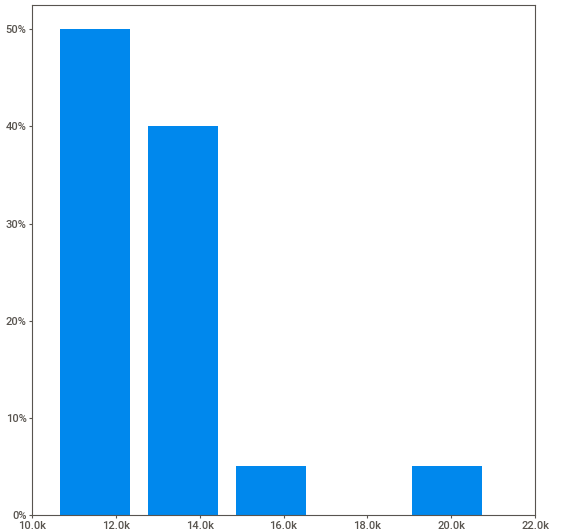
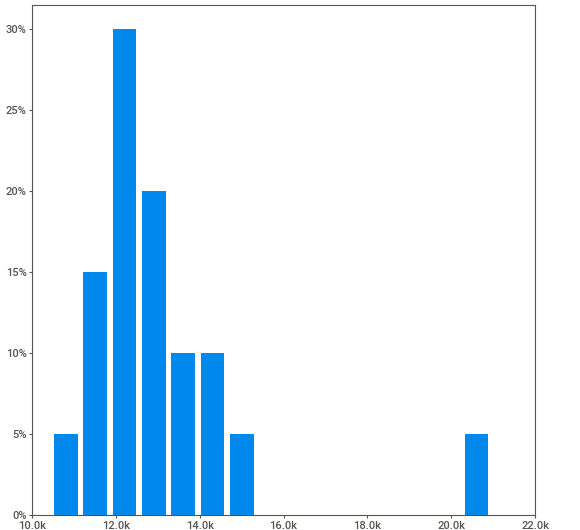
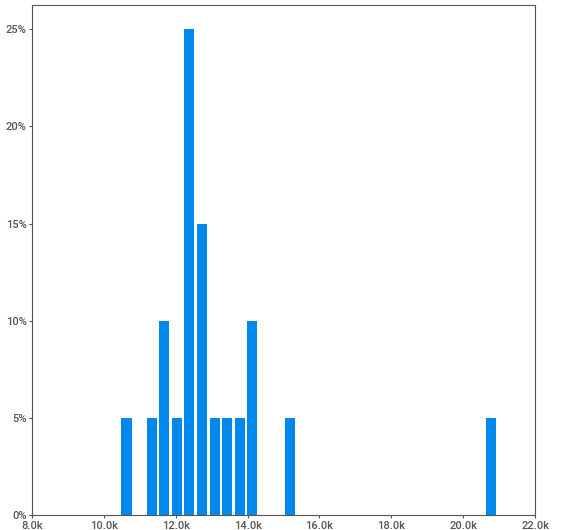
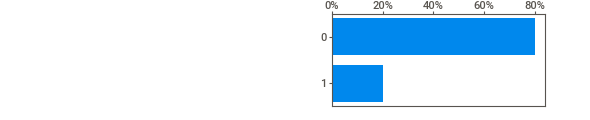
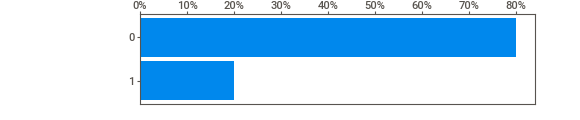
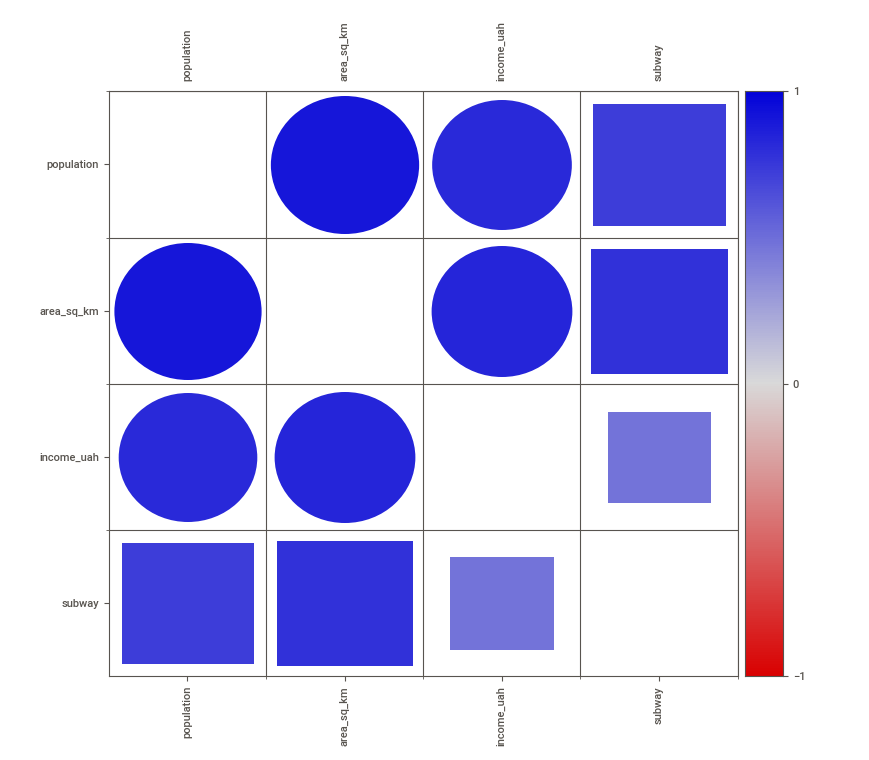
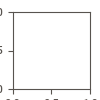

In [59]:
result = sv.analyze(df)
result.show_notebook()

In [60]:
yp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Висновок:
Бібліотека **SweetViz** надає стислий, але інформативний звіт щодо статистичної інформації стосовно масиву даних.
1. Надає загальні дані про датасет: 
    * кількість записів, 
    * кількість атрибутів (стовпчиків)
    * загальну інформацію про типи даних датасету (категоріальний/текстовий/числовий) 
2. Будує гістограми розподілення одновимірних масивів (стовпчиків) датасету і надає основні статистичні показники по ним.
3. Будує графічне відображення матриці кореляції (попарних залежностей між атрибутами).
4. Є можливість побудови звіту по двом датасетам, та порівняння їх між собою.

Бібліотека **Pandas Profiling** здається більш потужною, вона надає всі ті дані як і SweetViz, але ще і додаткову інформацію.
* Надає більш докладну статистичну інформацію про атрибути датасету (більше стат. показників)
* Більш ретально аналізує пропущені і нульові значення в датасеті
* Поглиблений аналіз текстових даних в т.ч. аналіз символів
* Будує не тільки графічну, а і числову матрицю кореляції

На мій погляд, обидві бібліотеки досить інформативні, прості та зручні у використанні.

    